# Калмыков Я.А. КЭ-319 ЮУрГУ
# Лабораторная работа по вычислительным методам.
# Численное интегрирование (Метод Симпсона)

* **Дана функция $y=artcg(x)$ на отрезке $[-1;1]$. Найти её численный определённый интеграл на всём промежутке.** 

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
""" Импорт необходимых библиотек
math - элементарные математические операции и константы
pandas - создание и редактирование DataFram'ов
matplot - создание и работа с графиками
numpy - работа с матрицами
"""


n=1000 # количество разбиений
a=-1 # левая граница
b=1 # правая граница
h=(b-a)/n # шаг
#m = n // 2 # количество разбиения на параболы
xi = [] # массив точек
xi_m = [] # массив средних точек  
vi = [] # массив значений функции
vi_m = [] # массив значений функции в средних точках
sum=[] # численная сумма
sum1=[] # значения интеграллов в точках разбиения (точное значение)
err=[] # погрешность

**Для решения поставленной задачи используем метод Симпсона**

In [2]:
# Исходная функция
def y(x):
  return math.atan(x)

# Точное значение интеграла
def f(x):
  return x*math.atan(x)-(math.pi)/4-math.log(1+x**2)/2+math.log(2)/2


""" Цикл прохода """
for i in range(1,n+2):
  xi.append(a+(i-1)*h) # добавление точек разбиения
  vi.append(y(xi[i-1])) # добавление значения функции в точках разбиения
  if i%2!=0:
    vi_m.append(y(xi[i-1]))
    xi_m.append(xi[i-1])

for i in range(1,n,2):
  
  if i==1:
    sum.append(round(h/3*(vi[i-1]+4*vi[i]+vi[i+1]),7))
  else:
    sum.append(round((sum[-1]+h/3*(vi[i-1]+4*vi[i]+vi[i+1])),7))
sum.append(sum[-1])

for j in range(1,len(xi_m)):
  if j==1:
    sum1.append(round((f(xi_m[1])-f(a)),7))
  else:
    sum1.append(round((f(xi_m[j])-f(a)),7))
  err.append(sum1[j-1]-sum[j-1])
    
sum1.append(sum1[-1])
err.append(err[-1])





**Создадим DataFrame для удобства работы и обработки данных**

In [3]:
"""Создание DataFram'а при помощи библиотеки Pandas"""
df = pd.DataFrame(index=list(range(1,len(xi_m)+1)))


df['xi']=(xi_m) # столбец точек разбиения
df['yi']=vi_m # столбец значений функции в точках разбиения
df['Si=Σ']=sum # столбец интегральной суммы
df['S*']=sum1 # столбец точных значений
df['|Si-S*|']=err # столбец погрешностей


print(df)

        xi        yi      Si=Σ        S*       |Si-S*|
1   -1.000 -0.785398 -0.003138 -0.003138  0.000000e+00
2   -0.996 -0.783394 -0.006267 -0.006267  1.000000e-07
3   -0.992 -0.781382 -0.009389 -0.009389  1.000000e-07
4   -0.988 -0.779362 -0.012502 -0.012502  1.000000e-07
5   -0.984 -0.777334 -0.015607 -0.015607  1.000000e-07
..     ...       ...       ...       ...           ...
497  0.984  0.777334 -0.009389 -0.009389  1.000000e-07
498  0.988  0.779362 -0.006267 -0.006267  1.000000e-07
499  0.992  0.781382 -0.003138 -0.003138  0.000000e+00
500  0.996  0.783394 -0.000000  0.000000  0.000000e+00
501  1.000  0.785398 -0.000000  0.000000  0.000000e+00

[501 rows x 5 columns]


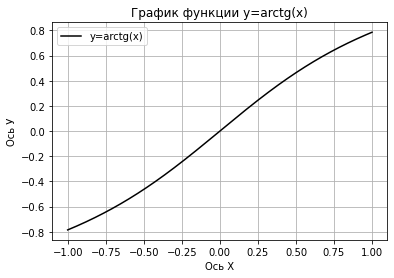

In [ ]:
df.plot(x="xi",y="yi",color='black', linewidth=1.5, marker='',  label='y=arctg(x)')

ax = plt.gca()  # получаем текущий объект Axes
ax.set_title("График функции y=arctg(x)")
ax.grid(True)
ax.set_xlabel('Ось Х')
ax.set_ylabel('Ось У')
ax.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Simpson`s method)/График функции y=arctg(x).png',dpi=1000)

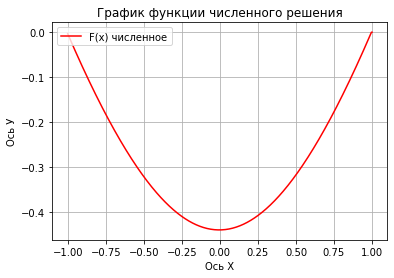

In [ ]:
df.plot(x='xi',y="Si=Σ",color='red', linewidth=1.5, marker='',  label='F(x) численное')
bx = plt.gca()  # получаем текущий объект Axes
bx.set_title("График функции численного решения")
bx.grid(True)
bx.set_xlabel('Ось Х')
bx.set_ylabel('Ось У')
bx.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Simpson`s method)/График численного решения.png',dpi=1000)

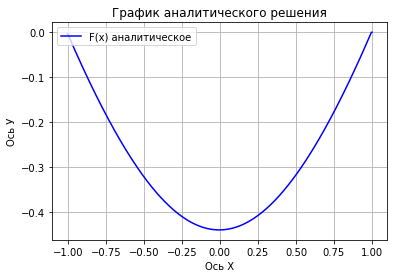

In [ ]:
df.plot(x='xi',y="S*",color='blue', linewidth=1.5, marker='',  label='F(x) аналитическое')
cx = plt.gca()  # получаем текущий объект Axes
cx.set_title("График аналитического решения")
cx.grid(True)
cx.set_xlabel('Ось Х')
cx.set_ylabel('Ось У')
cx.legend(loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Simpson`s method)/График функции аналитического решения.png',dpi=1000)

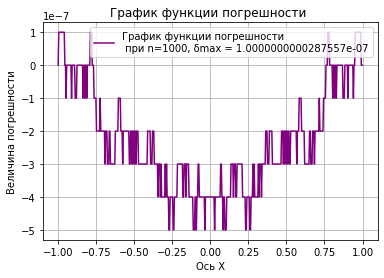

In [ ]:
#df.plot(x='xi',y="|Si-S*|",color='purple', linewidth=1.5, marker='',  label=('График функции погрешности \n при n={n1}, δmax = {max}'.format(n1=n,max = max(err))))
df.plot(x='xi',y="|Si-S*|",color='purple', linewidth=1.5, marker='',  label=(f'График функции погрешности \n при n={n}, δmax = {max(err)}'))
cx = plt.gca()  # получаем текущий объект Axes
cx.set_title("График функции погрешности ")
cx.grid(True)
cx.set_xlabel('Ось Х')
cx.set_ylabel('Величина погрешности')
cx.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Integration (Simpson`s method)/График функции погрешности.png',dpi=1000)

In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/Integration (Simpson`s method)/data.xlsx')